<a href="https://colab.research.google.com/github/braiso-22/Neuronal_Networks_Convolution/blob/main/redes_neuronales_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras


from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
keras.__version__

'2.11.0'

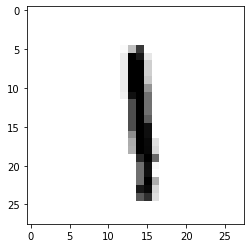

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [ ]:
print(x_train.ndim)
print(x_train.shape)

3
(60000, 28, 28)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_test.cl

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd",metrics = ['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.8571
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 0.6629 - accuracy: 0.8613
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 0.6364 - accuracy: 0.8653
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 0.6129 - accuracy: 0.8686
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5920 - accuracy: 0.8709


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5712 - accuracy: 0.8781


313/313 [==============================] - 1s 2ms/step


NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model.predict(x_test)

Y_pred_classes = np.argmax(predictions, axis = 1)
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx

313/313 [==============================] - 1s 2ms/step


array([[ 945,    0,    4,    4,    0,    7,   12,    3,    5,    0],
       [   0, 1106,    4,    3,    1,    1,    3,    2,   15,    0],
       [  14,   22,  874,   21,   14,    2,   25,   20,   33,    7],
       [   5,    2,   34,  875,    2,   31,    2,   33,   20,    6],
       [   0,    4,    4,    0,  910,    0,   20,    0,    5,   39],
       [  42,    5,    9,   73,   23,  657,   25,   14,   39,    5],
       [  16,    4,    9,    0,   11,   16,  894,    1,    7,    0],
       [   5,   27,   28,    2,    9,    2,    0,  897,    8,   50],
       [  13,   25,   11,   43,   16,   18,   28,   25,  784,   11],
       [  11,    3,    5,   11,   58,   16,    0,   50,   16,  839]])

In [ ]:
predictions[10]


array([0.74434733, 0.00293279, 0.00780354, 0.02862854, 0.00299976,
       0.16969548, 0.00648554, 0.00283862, 0.03339773, 0.00087076],
      dtype=float32)